In [90]:
#PREDICT THE PERCENTAGE OF AN STUDENT BASED ON THE NUMBER OF STUDY HOURS.

In [91]:
#import the packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# read the dataset 
df = pd.read_csv("tsf.csv")

In [93]:
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [94]:
#check number of rows and number of columns
df.shape     #30 rows and 2 columns

(25, 2)

In [95]:
#check dataset information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [40]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [41]:
#check any missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [42]:
#any outliers
df.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

In [43]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


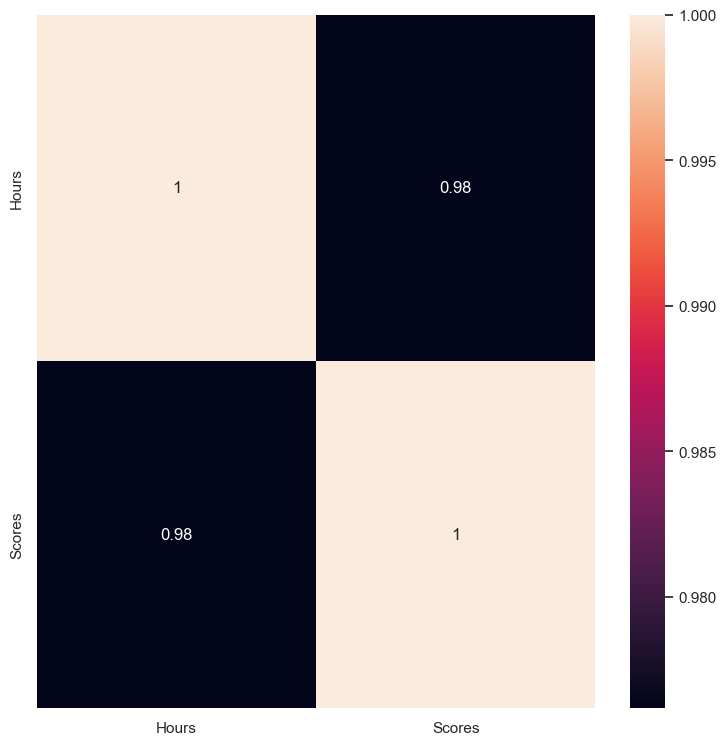

In [44]:
sns.heatmap(df.corr(),annot=True)
plt.show()

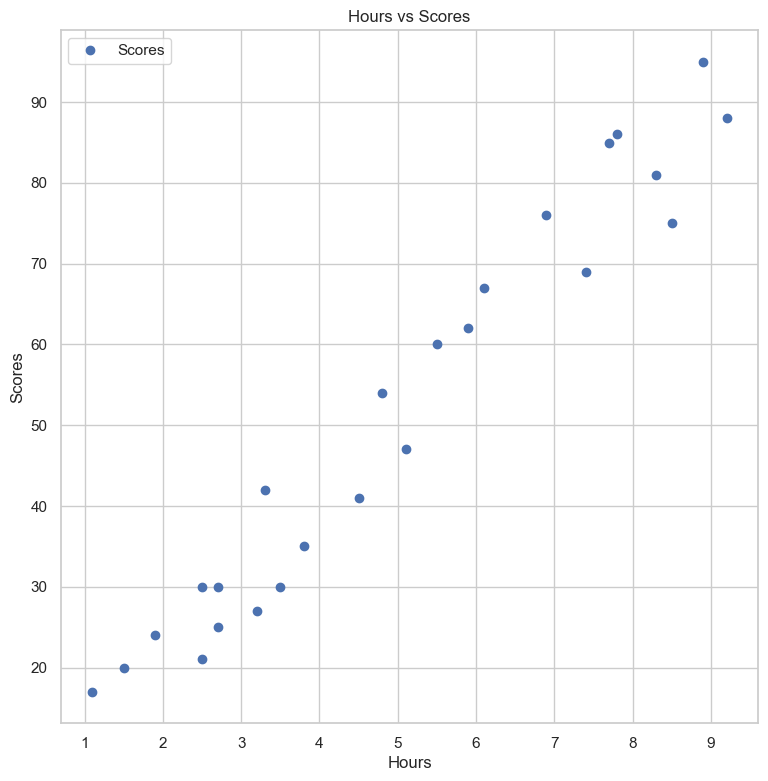

In [45]:
df.plot(x='Hours',
y='Scores', style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

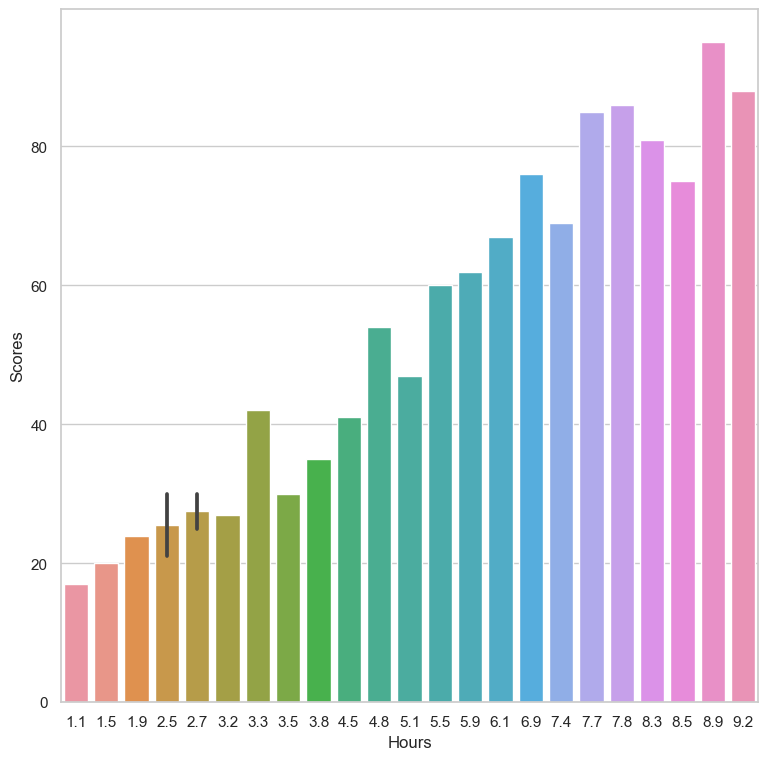

In [46]:
sns.barplot(x="Hours", y="Scores", data=df)
sns.set(rc={'figure.figsize':(9,9)})
plt.show()

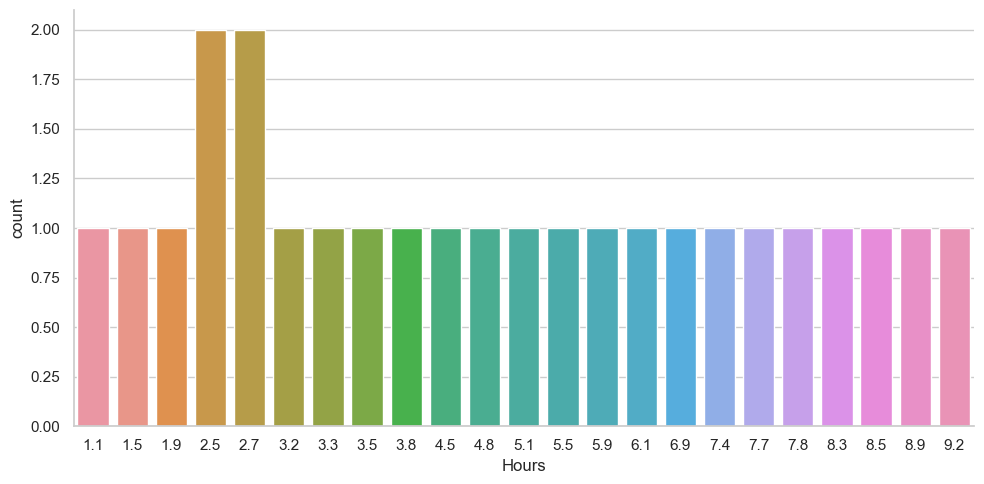

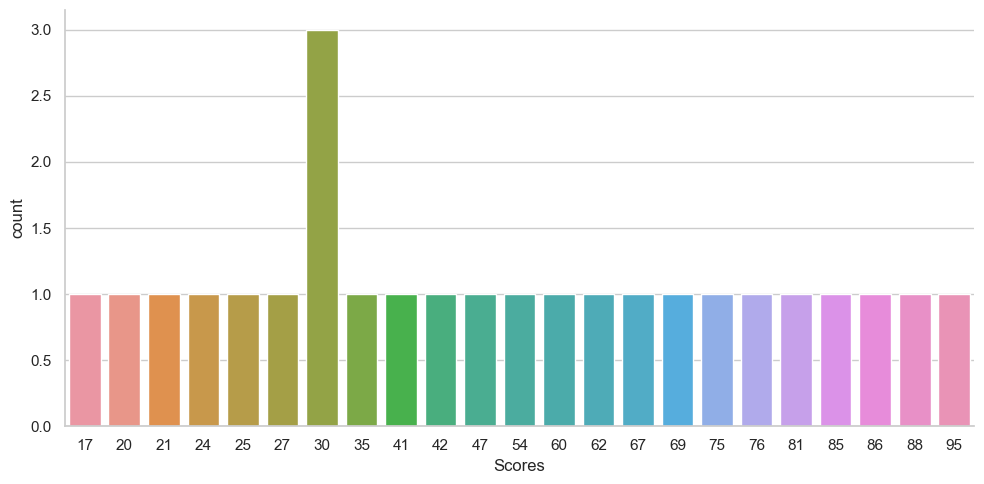

In [47]:
#Check the Bar Graph of Given Data using factorplot
sns.set_style("whitegrid")
sns.catplot(data=df, x='Hours', kind= 'count',height=5,aspect=2)
sns.catplot(data=df, x='Scores', kind= 'count',height=5,aspect=2)

In [48]:
#Independent and Dependent Variables

In [49]:
X=df.drop('Scores',axis=1)
y=df.Scores
X.head()


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [50]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [51]:
# Split data into training and testing data

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
#x will take all the values except for the last column which is our dependent variable (target variable)
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, random_state=0)

In [57]:
x_test.shape

(8, 1)

In [58]:
#Model Fitting

In [59]:
from sklearn.linear_model import LinearRegression

In [76]:
LR=LinearRegression()

In [77]:
LR.fit(x_train,y_train)

LinearRegression()

In [79]:
model=LR.fit(x_train,y_train)

In [63]:
LR.intercept_  

2.3708153823418883

In [64]:
LR.coef_      

array([9.78856669])

In [65]:
#Prediction

In [67]:
#Evaluate the Model
y_pred = LR.predict(x_test)

In [68]:
# Calculate metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

In [69]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 22.965097212700428
Mean Absolute Error: 4.419727808027651
R-squared: 0.9568211104435257


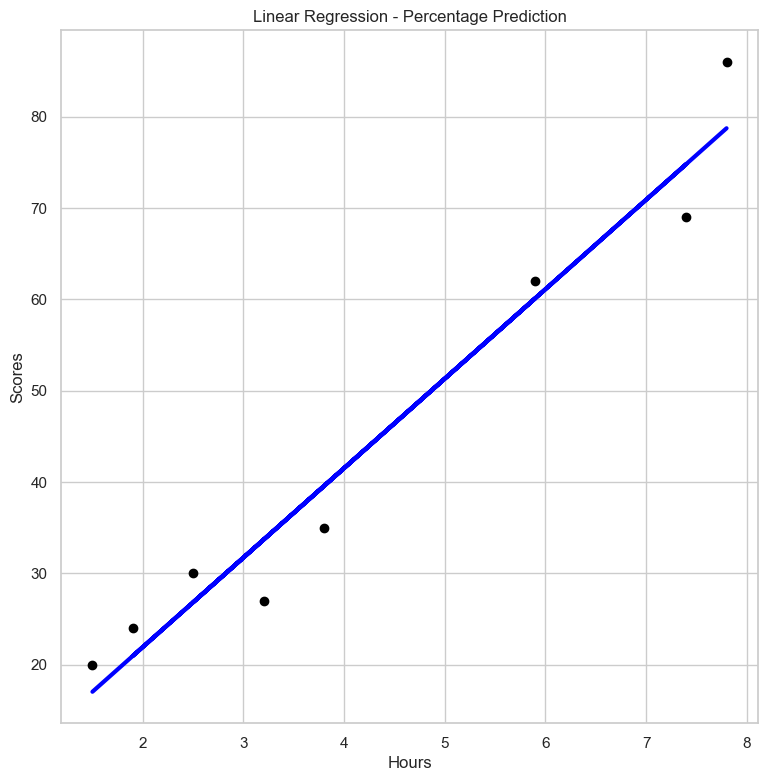

In [72]:
# Plot outputs
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Linear Regression - Percentage Prediction')
plt.show()

In [73]:
compare= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


<Axes: >

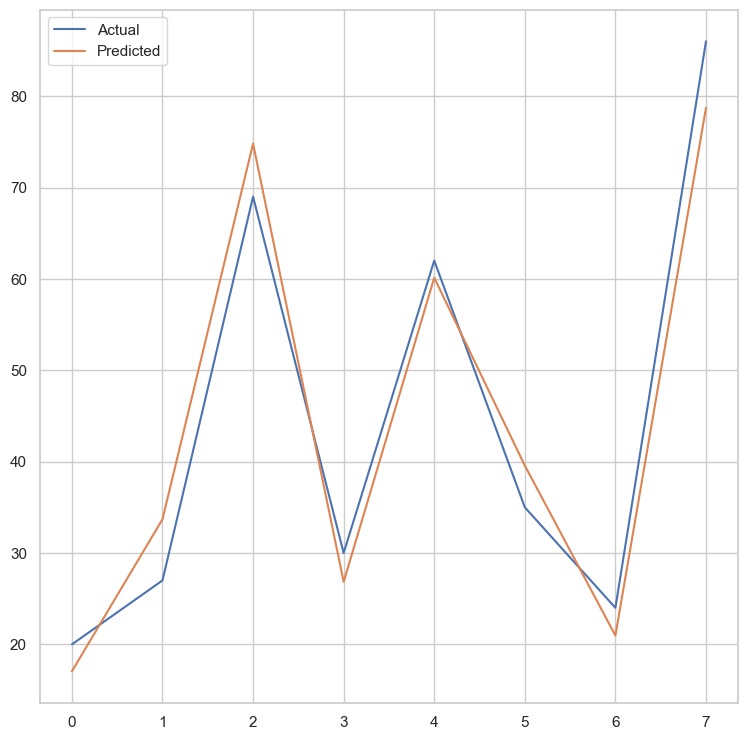

In [74]:
compare.plot()

In [80]:
model.score(x_train,y_train)

0.9484997422695115

In [81]:
model.score(x_test,y_test)

0.9568211104435257

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>
    <h1><b>Predict Score on Developed Model using Linear Regressing</b></h1>
   
</body>
</html>


In [85]:
#predicting the score 
df = np.array(9.25)
df = df.reshape(-1, 1)
pred = LR.predict(df)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [92.91505723].


In [88]:
df = np.array(10)
df = df.reshape(-1, 1)
pred = LR.predict(df)
print("If the student studies for 10 hours/day, the score is {}.".format(pred))

If the student studies for 10 hours/day, the score is [100.25648225].


<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>

<h3>Conclusion:<br>
We used a Linear Regression Model to predict the score of a student if he/she studies for 9.25 hours/day and the Predicted Score came out to be 92.91 and if he/she studies for 10 hours/day, Score will be 100.25648225.</h3>
</body>
</html>
